# The 3-Point Era: Are More Threes Really the Key to Winning?

This project explores the NBA’s dramatic shift toward 3-point shooting since the 3-point line was introduced in 1980. While it’s obvious that 3-point attempts (3PA) have skyrocketed. Especially following the rise of specifically Stephen Curry, we want to go beyond the surface.

The goal is to visualize this trend and then ask the real question: **Does taking more threes actually lead to more wins?** You don’t need a data analyst to tell you teams are shooting more. What we want to know is whether it’s working, and do you need an all time great shooter like Steph to make it work.

Some hypotheses we’ll explore later:
- Is there a correlation between 3-point volume and winning?
- Does a team need multiple high-efficiency shooters to make it work?
- Has the definition of “elite” 3-point shooting changed over time?

> *All league-wide data used in this analysis was sourced from [Basketball-Reference.com](https://www.basketball-reference.com/).*

### Visualizing the Rise in 3-Point Attempts (1980–Present)

This chart shows the league-wide average number of 3-point attempts (3PA) per game from 1980—the year the 3-point line was introduced—through the present day. The sharp rise in 3PA over the past two decades reflects a major shift in offensive strategy.

Notably, the chart highlights the 2009–10 season when Stephen Curry entered the NBA. His impact on the modern game is often credited with accelerating the 3-point revolution. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

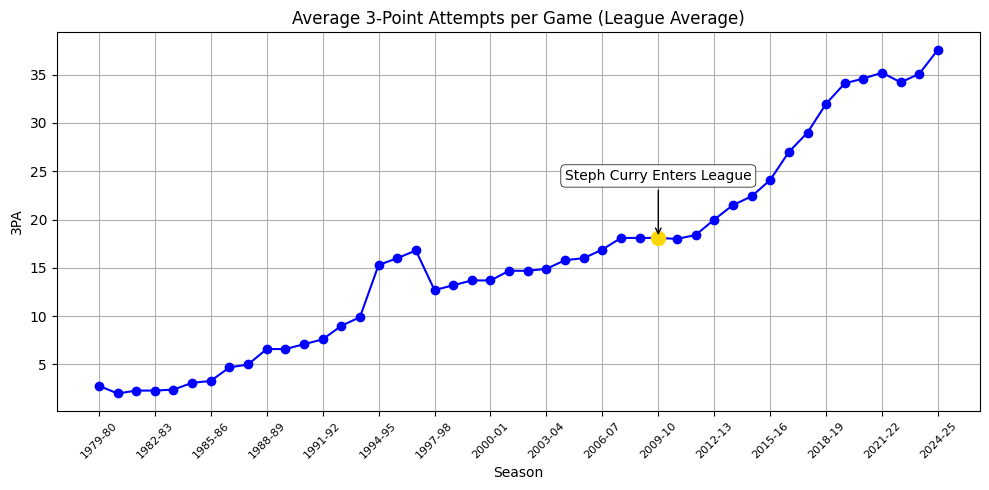

In [2]:

# Load the raw CSV and skip the first two rows
df = pd.read_csv('data/raw/league_per_game_raw.csv', skiprows=2)

# Keep only rows with valid season formats (e.g., "1980-81")
df = df[df['Season'].astype(str).str.contains('-')]

# Convert 3PA to numeric
df['3PA'] = pd.to_numeric(df['3PA'], errors='coerce')

# Sort seasons in chronological order
df = df[::-1].reset_index(drop=True)

# Plot the trend
plt.figure(figsize=(10, 5))

# Line plot of all 3PA values
plt.plot(df['Season'], df['3PA'], marker='o', color='blue')

# Highlight 2009-10 in gold
highlight_season = '2009-10'
highlight_value = df.loc[df['Season'] == highlight_season, '3PA'].values[0]
highlight_index = df.index[df['Season'] == highlight_season][0]

plt.plot(highlight_index, highlight_value, marker='o', color='gold', markersize=10)

# Add annotation
plt.annotate('Steph Curry Enters League',
             xy=(highlight_index, highlight_value),
             xytext=(highlight_index, highlight_value + 6),  # raised higher
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5))  # adds a readable background


plt.xticks(ticks=range(0, len(df), 3), labels=df['Season'][::3], rotation=45, fontsize=8)
plt.title('Average 3-Point Attempts per Game (League Average)')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.grid(True)
plt.tight_layout()
plt.show()



### 3PA vs FGA per 100 Possessions

This chart compares the number of 3-point attempts (3PA) and total field goal attempts (FGA) per 100 possessions across seasons. By looking at 3PA in the context of total shot volume, we can see how much of a team's offensive strategy is dedicated to shooting from beyond the arc.

While total FGA per 100 possessions has remained relatively stable over time, the number of 3-point attempts has steadily increased. This indicates that teams aren't necessarily getting more shots up per possession—they're just choosing to take more of those shots from three-point range. (which, pretty obvious)

As with the previous chart, the 2009–10 season is highlighted to mark the beginning of Stephen Curry's NBA career—a key moment often associated with the surge in 3-point shooting.



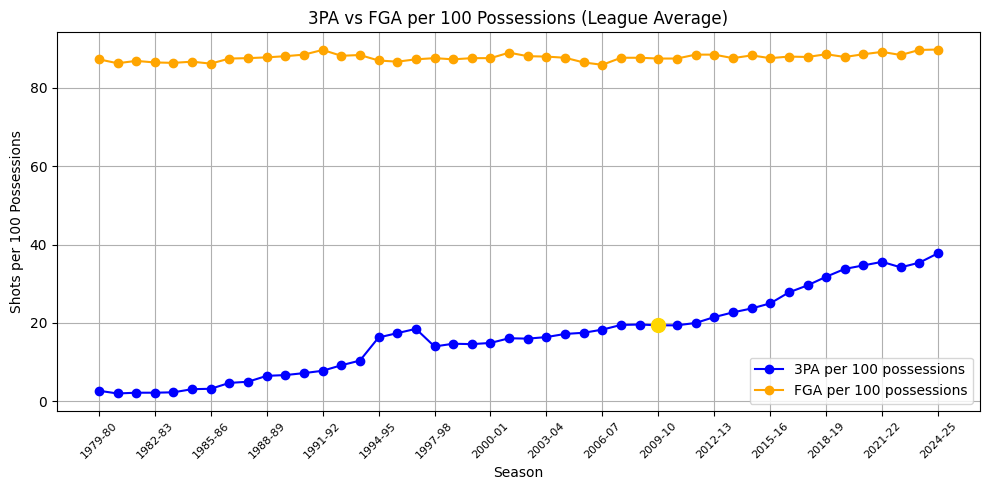

In [14]:

# Load and clean the per 100 possessions data
df_poss = pd.read_csv('data/raw/league_per_poss_raw.csv', skiprows=2)

# Keep only valid seasons
df_poss = df_poss[df_poss['Season'].astype(str).str.contains('-')]

# Convert columns to numeric
df_poss['3PA'] = pd.to_numeric(df_poss['3PA'], errors='coerce')
df_poss['FGA'] = pd.to_numeric(df_poss['FGA'], errors='coerce')

# Sort by season chronologically
df_poss = df_poss[::-1].reset_index(drop=True)

# Highlight Steph Curry's rookie season
highlight_season = '2009-10'
highlight_index = df_poss.index[df_poss['Season'] == highlight_season][0]
highlight_3pa = df_poss.loc[df_poss['Season'] == highlight_season, '3PA'].values[0]

# ------------------ Plot 1: 3PA and FGA per 100 possessions ------------------
plt.figure(figsize=(10, 5))
plt.plot(df_poss['Season'], df_poss['3PA'], marker='o', color='blue', label='3PA per 100 possessions')
plt.plot(df_poss['Season'], df_poss['FGA'], marker='o', color='orange', label='FGA per 100 possessions')
plt.plot(highlight_index, highlight_3pa, marker='o', color='gold', markersize=10)


plt.xticks(ticks=range(0, len(df_poss), 3), labels=df_poss['Season'][::3], rotation=45, fontsize=8)
plt.title('3PA vs FGA per 100 Possessions (League Average)')
plt.xlabel('Season')
plt.ylabel('Shots per 100 Possessions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Pace of the Game

Before diving deeper into the analytics, it's worth addressing a common assumption: that the rise in 3-point shooting has significantly increased the pace of the game. However, the chart below suggests otherwise. 

When the 3-point line was first introduced, the league was actually playing at a faster pace than it is today. While pace has fluctuated over the years and has trended upward in recent seasons, it's clear that the increase in 3-point attempts hasn’t directly translated to more possessions per game.


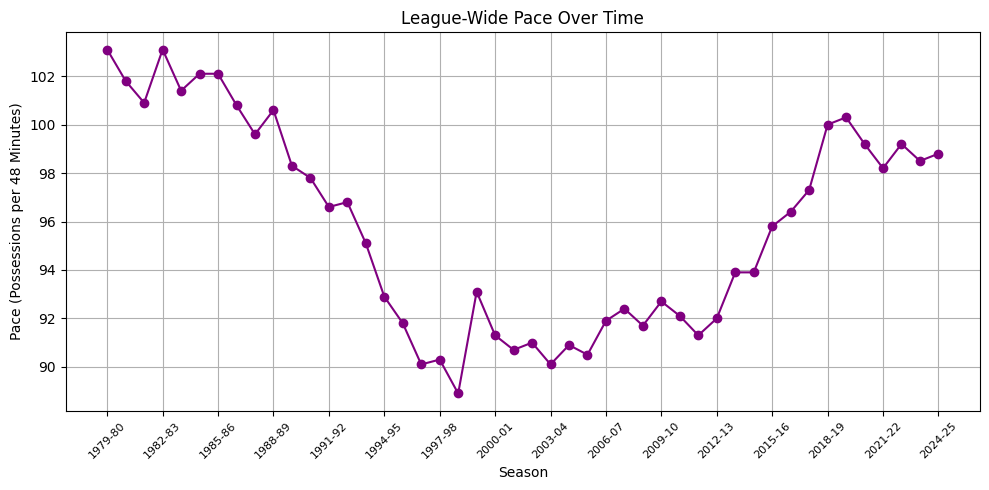

In [6]:

# Load the per-game dataset and skip the header rows
df_pace = pd.read_csv('data/raw/league_per_game_raw.csv', skiprows=2)

# Filter valid seasons
df_pace = df_pace[df_pace['Season'].astype(str).str.contains('-')]

# Convert 'Pace' to numeric
df_pace['Pace'] = pd.to_numeric(df_pace['Pace'], errors='coerce')

# Sort by season in chronological order
df_pace = df_pace[::-1].reset_index(drop=True)

# Plot league-wide Pace over time
plt.figure(figsize=(10, 5))
plt.plot(df_pace['Season'], df_pace['Pace'], marker='o', color='purple')
plt.xticks(ticks=range(0, len(df_pace), 3), labels=df_pace['Season'][::3], rotation=45, fontsize=8)
plt.title('League-Wide Pace Over Time')
plt.xlabel('Season')
plt.ylabel('Pace (Possessions per 48 Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Points per Possession

While the pace of play hasn’t reached all-time highs, scoring efficiency certainly has. This chart shows the average number of points scored per 100 possessions since 1980, and the upward trend is clear.

Even without a dramatic increase in possessions, teams are putting up more points than ever—largely due to the growing emphasis on the 3-point shot. This reinforces just how impactful the 3-point revolution has been in shaping modern offensive efficiency.


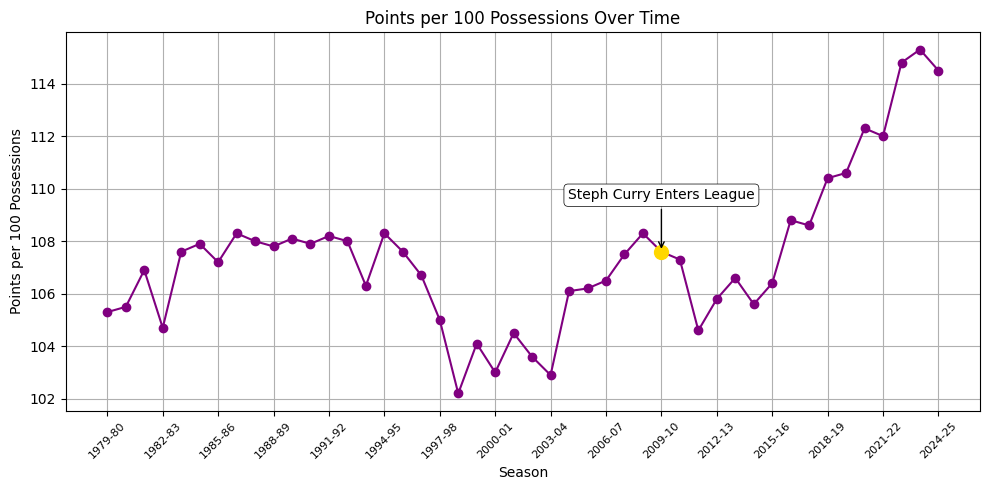

In [9]:
# Load the per 100 possessions dataset
df_poss = pd.read_csv('data/raw/league_per_poss_raw.csv', skiprows=2)

# Keep only valid season rows
df_poss = df_poss[df_poss['Season'].astype(str).str.contains('-')]

# Convert 'PTS' to numeric
df_poss['PTS'] = pd.to_numeric(df_poss['PTS'], errors='coerce')

# Sort seasons in chronological order
df_poss = df_poss[::-1].reset_index(drop=True)

# Locate Steph Curry's rookie season value
highlight_season = '2009-10'
highlight_value = df_poss.loc[df_poss['Season'] == highlight_season, 'PTS'].values[0]
highlight_index = df_poss.index[df_poss['Season'] == highlight_season][0]

# Plot points per 100 possessions over time
plt.figure(figsize=(10, 5))
plt.plot(df_poss['Season'], df_poss['PTS'], marker='o', color='purple')

# Add gold marker and annotation for Steph Curry's rookie year
plt.plot(highlight_index, highlight_value, marker='o', color='gold', markersize=10)
plt.annotate('Steph Curry Enters League',
             xy=(highlight_index, highlight_value),
             xytext=(highlight_index, highlight_value + 2),
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5))

plt.xticks(ticks=range(0, len(df_poss), 3), labels=df_poss['Season'][::3], rotation=45, fontsize=8)
plt.title('Points per 100 Possessions Over Time')
plt.xlabel('Season')
plt.ylabel('Points per 100 Possessions')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3-Pointers Have Increased Scoring

Over the past 45 years since the introduction of the 3-point line, it’s clear that more 3-point attempts have contributed to higher overall scoring. But scoring alone doesn’t tell the full story. In the next section, we’ll explore whether this increase in volume has actually translated to more wins—especially in the last decade, when nearly every team has leaned heavily into the 3-point strategy.


### 3s vs Wins

The following chart explores the relationship between 3-point attempts and team success. It focuses solely on **how many** threes each team takes — not how well they shoot them — and compares that volume to their win percentage.

As you can see the Celtics are completely insane with how much threes they shoot, putting up about 13.5% more threes then the second highest team. Obviously it works for them but since they just won a championship but if they get cold they can also die by the three, as we just saw in the most recent playoffs against the Knicks (Knicks fan here, very happy to see that).


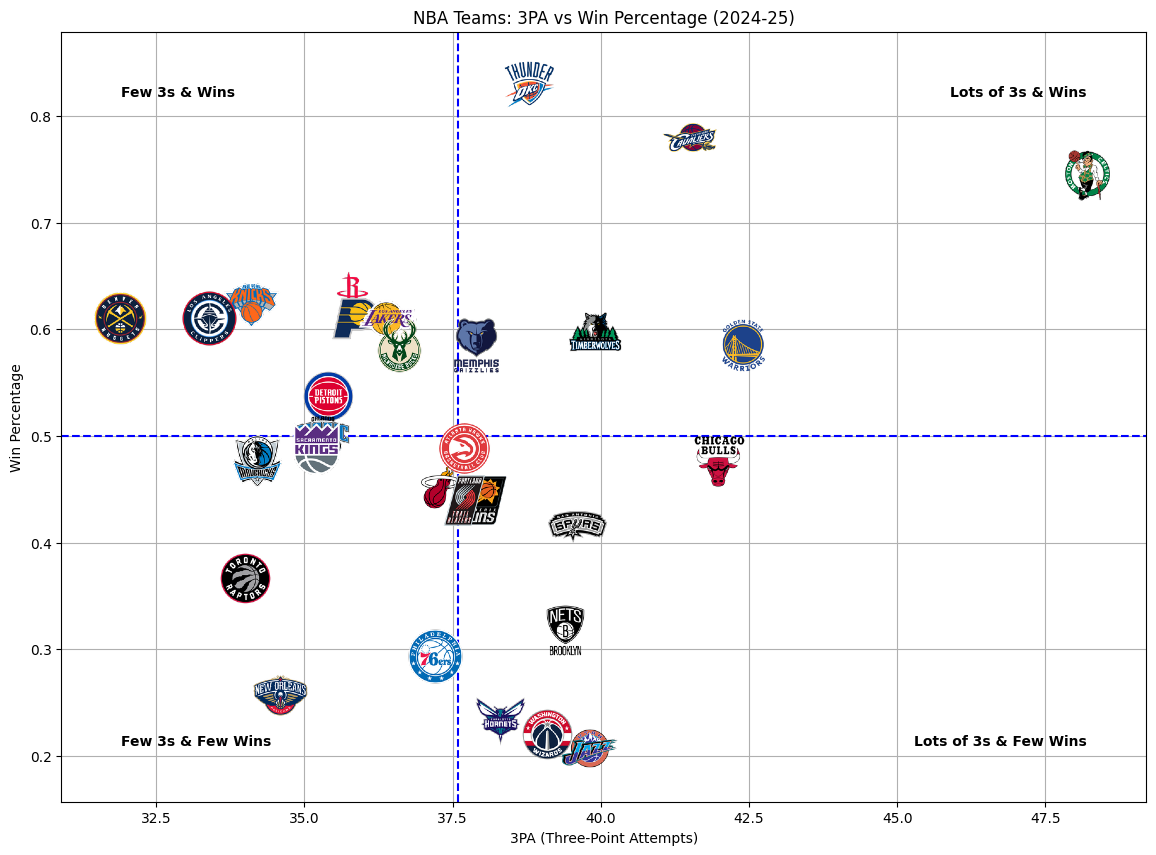

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image
import numpy as np

# Load the dataset
df = pd.read_csv("data/raw/teams_by_year/24-25_team_stats.csv")

# Remove the "League Average" row
df = df[df["Team"] != "League Average"].copy()

# Extract relevant data
x = df["3PA"]
y = df["W/L"]
teams = df["Team"]

# Calculate custom divider lines
x_mean = x.mean()
y_line = 0.500

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot divider lines
ax.axvline(x=x_mean, color='blue', linestyle='--')
ax.axhline(y=y_line, color='blue', linestyle='--')

# Add quadrant labels in corners
ax.text(x.max(), y.max(), 'Lots of 3s & Wins', fontsize=10, weight='bold',
        ha='right', va='top')
ax.text(x.min(), y.max(), 'Few 3s & Wins', fontsize=10, weight='bold',
        ha='left', va='top')
ax.text(x.max(), y.min(), 'Lots of 3s & Few Wins', fontsize=10, weight='bold',
        ha='right', va='bottom')
ax.text(x.min(), y.min(), 'Few 3s & Few Wins', fontsize=10, weight='bold',
        ha='left', va='bottom')

# Function to load and normalize logo size
def get_team_logo(path, zoom=0.45, size=(100, 100)):
    img = Image.open(path).convert("RGBA")
    img = img.resize(size, Image.Resampling.LANCZOS)
    return OffsetImage(np.array(img), zoom=zoom)

# Path to team logos
logo_base_path = "data/logos/"
missing_logos = []

# Plot each team logo
for _, row in df.iterrows():
    team_name = row['Team'].lower().replace(" ", "-").replace("’", "").replace("'", "").replace(".", "")
    filename = f"nba-{team_name}-logo.png"
    logo_path = os.path.join(logo_base_path, filename)
    
    if not os.path.exists(logo_path):
        missing_logos.append((row['Team'], filename))
    else:
        logo_img = get_team_logo(logo_path)
        ab = AnnotationBbox(logo_img, (row["3PA"], row["W/L"]), frameon=False)
        ax.add_artist(ab)

# Raise an error if any logos were missing
if missing_logos:
    error_message = "The following logos were not found:\n" + \
                    "\n".join([f"{team} → {file}" for team, file in missing_logos])
    raise FileNotFoundError(error_message)

# Final plot formatting
ax.set_xlabel("3PA (Three-Point Attempts)")
ax.set_ylabel("Win Percentage")
ax.set_title("NBA Teams: 3PA vs Win Percentage (2024-25)")
ax.set_xlim(x.min() - 1, x.max() + 1)
ax.set_ylim(y.min() - 0.05, y.max() + 0.05)
ax.set_aspect('auto')  # Prevent distortion
ax.grid(True)

plt.show()


### 3s vs Wins w/o Celtics

I made the same chart without the Celtics skewing everything to show that some of the teams towards the bottom like the Jazz, Wizards, Nets, and Hornets actually do shoot a ton of 3s and still lose a lot it was just hard to make that conclusion with the Celtics increasing the average so much and shifting the entire rest of the chart to the left. 

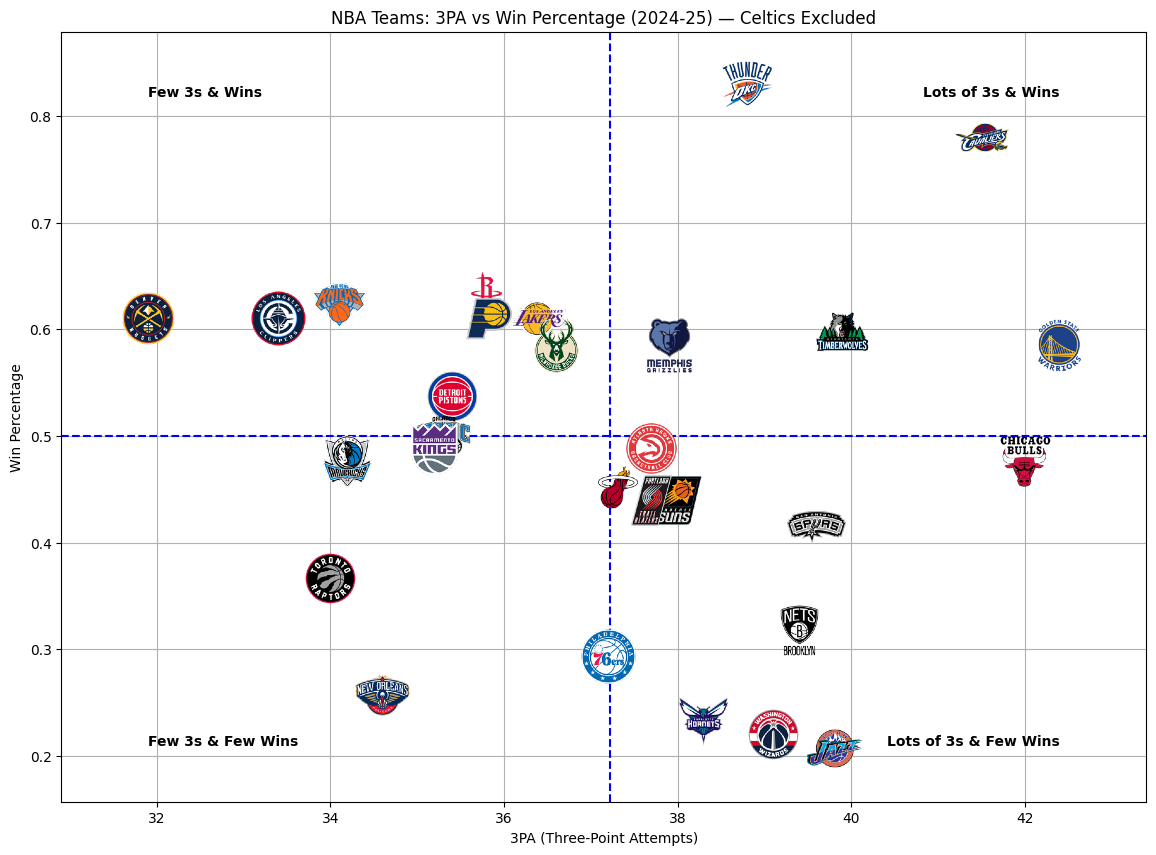

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image
import numpy as np

# Load the dataset
df = pd.read_csv("data/raw/teams_by_year/24-25_team_stats.csv")

# Remove "League Average" and "Boston Celtics"
df = df[(df["Team"] != "League Average") & (df["Team"] != "Boston Celtics")].copy()

# Extract relevant data
x = df["3PA"]
y = df["W/L"]
teams = df["Team"]

# Calculate custom divider lines
x_mean = x.mean()
y_line = 0.500

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot divider lines
ax.axvline(x=x_mean, color='blue', linestyle='--')
ax.axhline(y=y_line, color='blue', linestyle='--')

# Add quadrant labels in corners
ax.text(x.max(), y.max(), 'Lots of 3s & Wins', fontsize=10, weight='bold',
        ha='right', va='top')
ax.text(x.min(), y.max(), 'Few 3s & Wins', fontsize=10, weight='bold',
        ha='left', va='top')
ax.text(x.max(), y.min(), 'Lots of 3s & Few Wins', fontsize=10, weight='bold',
        ha='right', va='bottom')
ax.text(x.min(), y.min(), 'Few 3s & Few Wins', fontsize=10, weight='bold',
        ha='left', va='bottom')

# Function to load and normalize logo size
def get_team_logo(path, zoom=0.45, size=(100, 100)):
    img = Image.open(path).convert("RGBA")
    img = img.resize(size, Image.Resampling.LANCZOS)
    return OffsetImage(np.array(img), zoom=zoom)

# Path to team logos
logo_base_path = "data/logos/"
missing_logos = []

# Plot each team logo
for _, row in df.iterrows():
    team_name = row['Team'].lower().replace(" ", "-").replace("’", "").replace("'", "").replace(".", "")
    filename = f"nba-{team_name}-logo.png"
    logo_path = os.path.join(logo_base_path, filename)
    
    if not os.path.exists(logo_path):
        missing_logos.append((row['Team'], filename))
    else:
        logo_img = get_team_logo(logo_path)
        ab = AnnotationBbox(logo_img, (row["3PA"], row["W/L"]), frameon=False)
        ax.add_artist(ab)

# Raise an error if any logos were missing
if missing_logos:
    error_message = "The following logos were not found:\n" + \
                    "\n".join([f"{team} → {file}" for team, file in missing_logos])
    raise FileNotFoundError(error_message)

# Final plot formatting
ax.set_xlabel("3PA (Three-Point Attempts)")
ax.set_ylabel("Win Percentage")
ax.set_title("NBA Teams: 3PA vs Win Percentage (2024-25) — Celtics Excluded")
ax.set_xlim(x.min() - 1, x.max() + 1)
ax.set_ylim(y.min() - 0.05, y.max() + 0.05)
ax.set_aspect('auto')
ax.grid(True)

plt.show()
